In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

In [247]:
df=pd.read_excel('/Users/umangpandya/Documents/Data mining/seeds_data.xlsx', names =["ID", "area", "perimeter", "compactness", "lengthOfKernel", "widthOfKernel", "regionSold", "asymmetryCoefficient", "lengthOfKernelGroove", "seedType"])
df = df.drop(columns='ID')
df.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,regionSold,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,a,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,d,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,c,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,e,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,c,1.355,5.175,1


In [149]:
df['seedType'].value_counts()

1    70
2    70
3    70
Name: seedType, dtype: int64

In [188]:
df.describe()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


Text(0.5, 1, 'Umang')

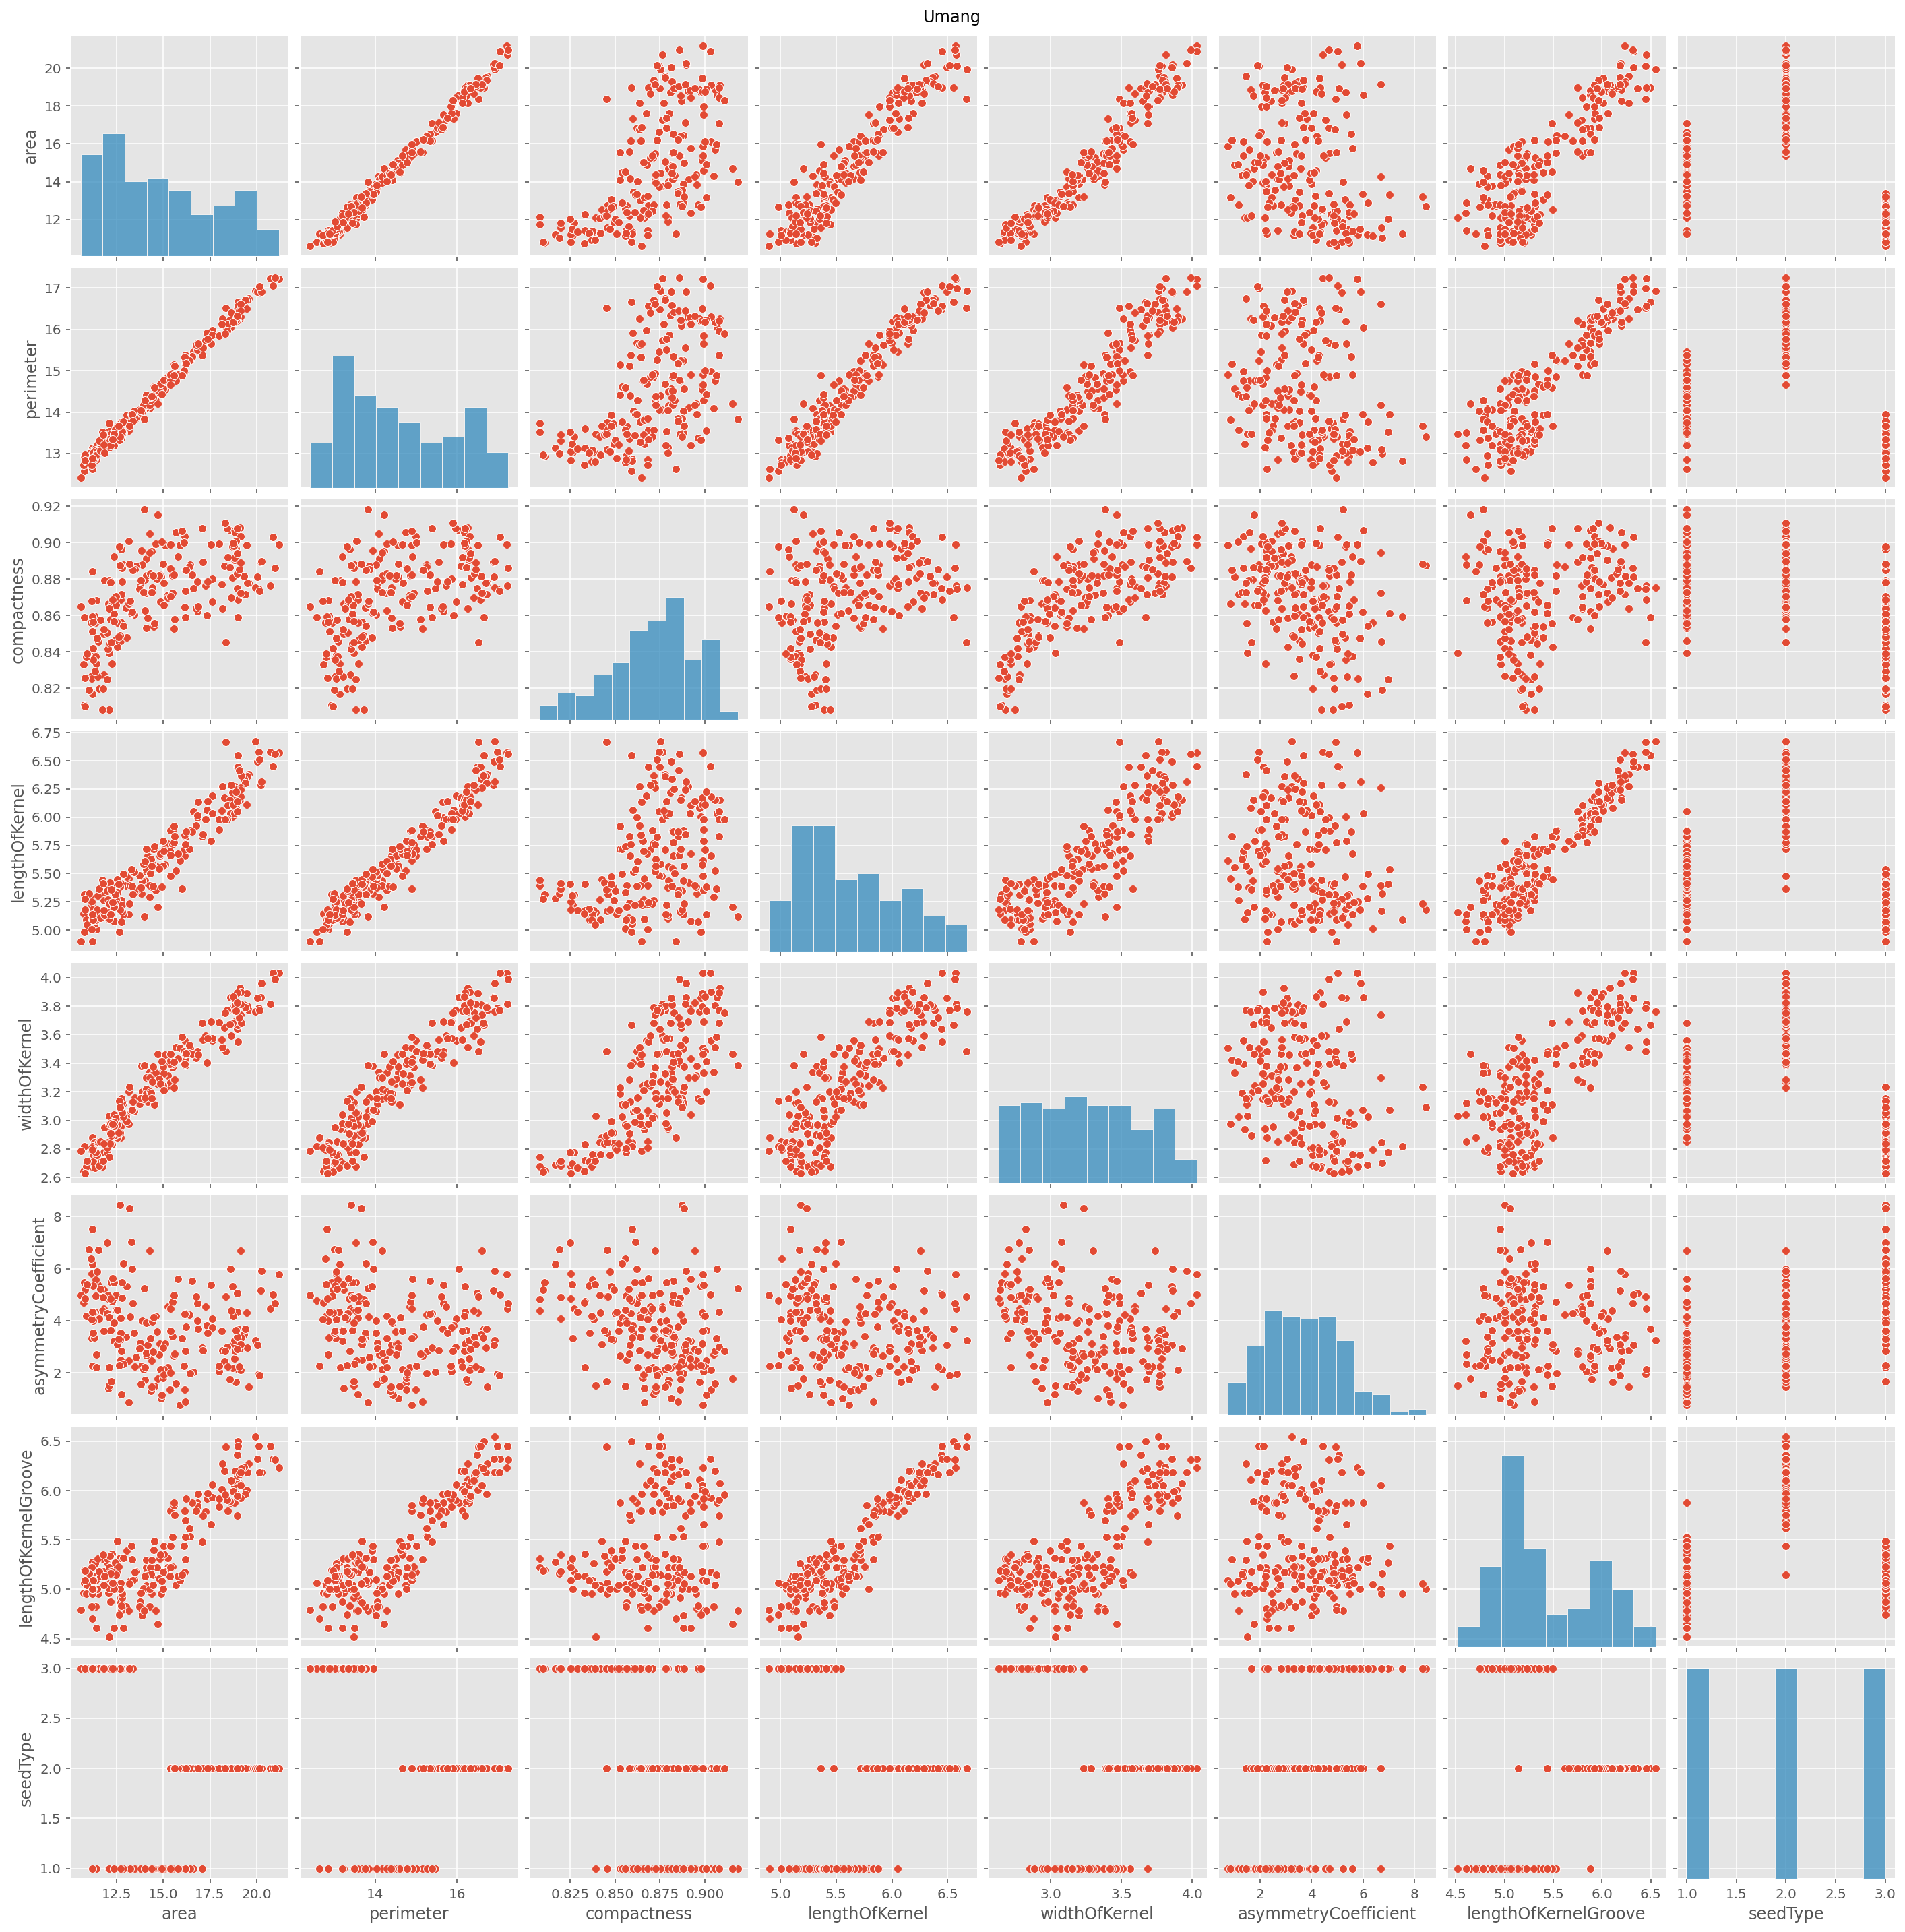

In [285]:
g = sns.pairplot(df)
g.fig.suptitle("Umang", y=1) # y= some height>1

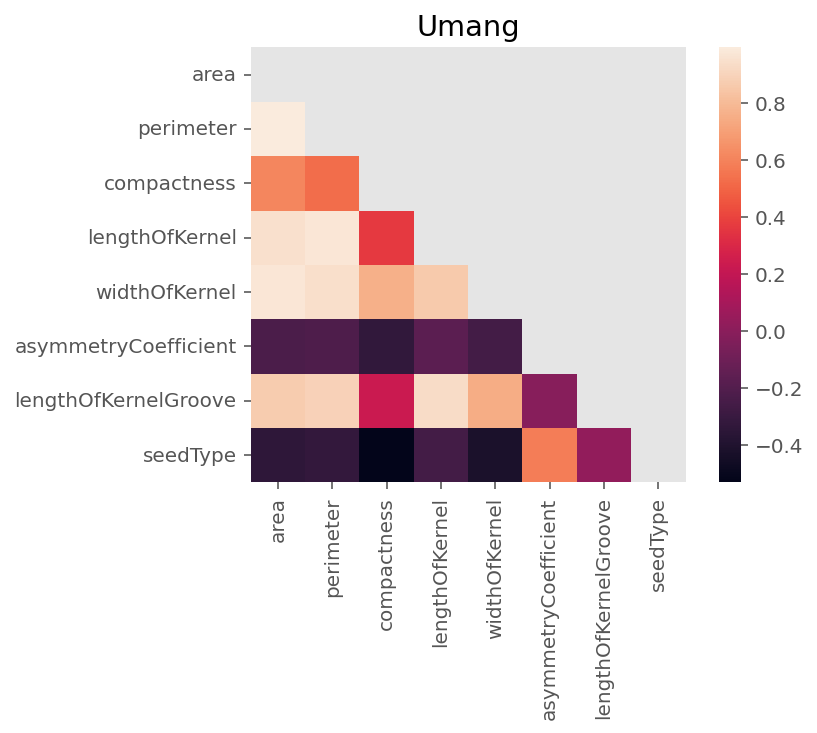

In [290]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr()
 
# Can be great to plot only a half matrix
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask
ax = plt.axes()
sns.heatmap(corr_matrix, mask=mask, square=True, ax=ax)
ax.set_title('corr plot (Umang)')
plt.show()

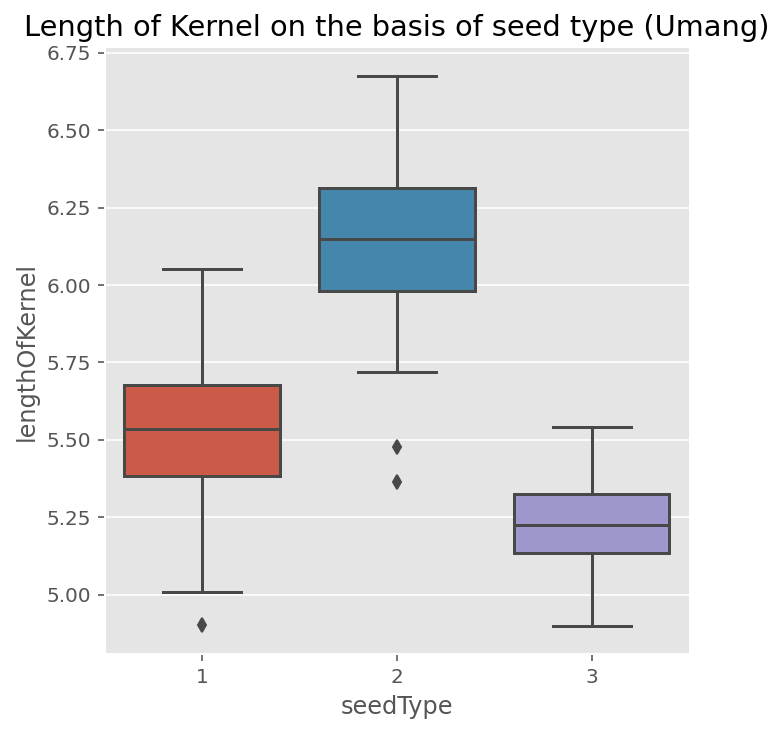

In [291]:
g = sns.catplot(x="seedType", y="lengthOfKernel", kind="box", data=df)
g.set(title = "Length of Kernel on the basis of seed type (Umang)")

In [189]:
# Now all the preprocessing starts
# encoding the target features
Data = df.drop(columns='seedType')
target = pd.DataFrame(df['seedType'])

In [190]:
target

,seedType
0,1
1,1
2,1
3,1
4,1
...,...
205,3
206,3
207,3
208,3


In [157]:
#. encoding categorical features
categorical_cols = Data.columns[Data.dtypes==object].tolist()
categorical_cols

['regionSold']

In [191]:
for col in categorical_cols:
    if (Data[col].nunique() == 2):
        Data[col] = pd.get_dummies(Data[col], drop_first=True)
   
# use one-hot-encoding for categorical features with >2 levels
Data = pd.get_dummies(Data)

In [192]:
Data.columns

Index(['area', 'perimeter', 'compactness', 'lengthOfKernel', 'widthOfKernel',
       'asymmetryCoefficient', 'lengthOfKernelGroove', 'regionSold_a',
       'regionSold_b', 'regionSold_c', 'regionSold_d', 'regionSold_e'],
      dtype='object')

In [193]:
Data.sample(5, random_state=999)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,regionSold_a,regionSold_b,regionSold_c,regionSold_d,regionSold_e
209,12.30,13.34,0.8684,5.243,2.974,5.637,5.063,0,0,1,0,0
26,13.02,13.76,0.8641,5.395,3.026,3.373,4.825,0,0,1,0,0
42,13.16,13.55,0.9009,5.138,3.201,2.461,4.783,0,0,0,1,0
34,15.05,14.68,0.8779,5.712,3.328,2.129,5.360,0,1,0,0,0
131,18.94,16.32,0.8942,6.144,3.825,2.908,5.949,1,0,0,0,0


In [194]:
Data_df = Data.copy()

Data_scaler = preprocessing.MinMaxScaler()
Data_scaler.fit(Data)
Data = Data_scaler.fit_transform(Data)

In [195]:
pd.DataFrame(Data, columns=Data_df.columns).sample(5, random_state=999)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,regionSold_a,regionSold_b,regionSold_c,regionSold_d,regionSold_e
209,0.161473,0.192149,0.547187,0.193694,0.245189,0.633463,0.267848,0.0,0.0,1.0,0.0,0.0
26,0.229462,0.278926,0.508167,0.279279,0.282252,0.339089,0.150665,0.0,0.0,1.0,0.0,0.0
42,0.242682,0.235537,0.842105,0.134572,0.406985,0.220507,0.129985,0.0,0.0,0.0,1.0,0.0
34,0.421152,0.469008,0.633394,0.457770,0.497505,0.177339,0.414082,0.0,1.0,0.0,0.0,0.0
131,0.788480,0.807851,0.781307,0.701014,0.851746,0.278628,0.704087,1.0,0.0,0.0,0.0,0.0


In [200]:
num_features = 7
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target.values.ravel())
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = Data_df.columns[fs_indices_rfi].values
best_features_rfi

array(['perimeter', 'area', 'lengthOfKernelGroove', 'lengthOfKernel',
       'widthOfKernel', 'asymmetryCoefficient', 'compactness'],
      dtype=object)

In [201]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.20793539, 0.18291221, 0.17438868, 0.14572785, 0.13489815,
       0.07548682, 0.06492868])

In [294]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

def plot_imp(best_features, scores, method_name):   
    plt.barh(best_features, scores)
    plt.title(method_name + ' Feature Importances (Umang)')
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

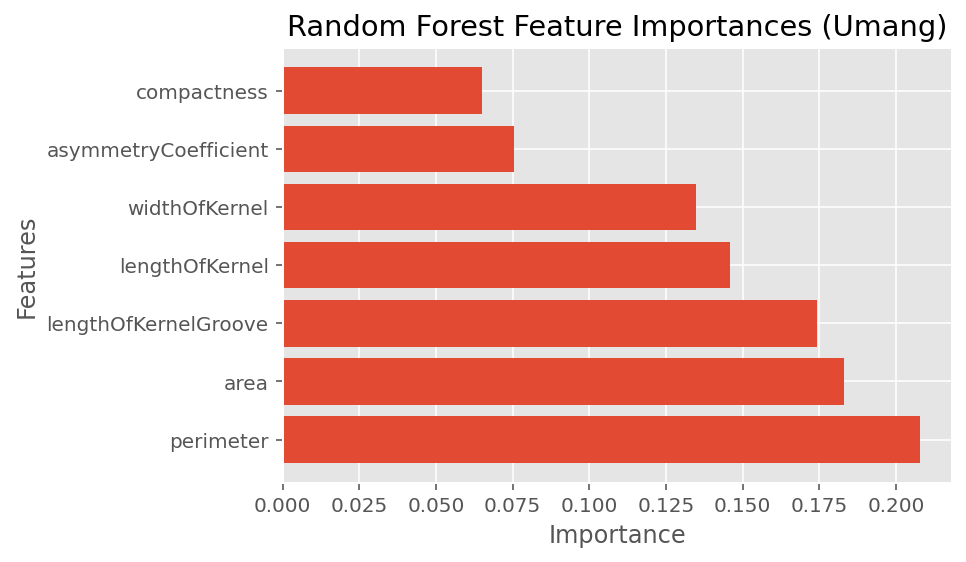

In [295]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest')

In [204]:
#making sure our dataset is in pandas dataframe format
Data = pd.DataFrame(Data, columns=Data_df.columns)
Data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,regionSold_a,regionSold_b,regionSold_c,regionSold_d,regionSold_e
0,0.440982,0.502066,0.570780,0.486486,0.486101,0.189302,0.345150,1.0,0.0,0.0,0.0,0.0
1,0.405099,0.446281,0.662432,0.368806,0.501069,0.032883,0.215165,0.0,0.0,0.0,1.0,0.0
2,0.349386,0.347107,0.879310,0.220721,0.503920,0.251453,0.150665,0.0,0.0,1.0,0.0,0.0
3,0.306893,0.316116,0.793103,0.239302,0.533856,0.194243,0.140817,0.0,0.0,0.0,0.0,1.0
4,0.524079,0.533058,0.864791,0.427365,0.664291,0.076701,0.322994,0.0,0.0,1.0,0.0,0.0


In [205]:
# updating the dataframe and just keeping the features which are important(Feature selection)
Data = Data.loc[:,list(best_features_rfi)]

KFold(n_splits=10, random_state=None, shuffle=False)

In [206]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [207]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 10)

In [140]:
target

,seedType
0,1
1,1
2,1
3,1
4,1
...,...
205,3
206,3
207,3
208,3


In [305]:
# prepare the cross-validation procedure
kf = KFold(n_splits = 10, shuffle = True)

In [306]:
kf.get_n_splits(Data,target)

10

In [307]:
for train_index, test_index in kf.split(Data,target):
    X_train, X_test = Data.iloc[train_index], Data.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]

In [309]:
# 1) creating a svm model
svm_model = svm.SVC()
svm_model.fit(X_train, y_train.values.ravel())

SVC()

In [310]:
# predict the values using the fitted model
prediction_svm_model = svm_model.predict(X_test)

In [304]:
# classification report
print(classification_report(y_test,prediction_svm_model))

# confusion matrix
cf_matrix_svm = confusion_matrix(y_test,prediction_svm_model)
print(cf_matrix_svm)

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         9
           3       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.89      0.89      0.89        21
weighted avg       0.90      0.90      0.90        21

[[5 0 1]
 [0 9 0]
 [1 0 5]]


In [214]:
# 1) creating a logistic regression model
log_reg_model = LogisticRegression()

In [220]:
log_reg_model.fit(X_train, y_train.values.ravel())

LogisticRegression()

In [302]:
# predict the values using the fitted model
prediction_log_reg_model = log_reg_model.predict(X_test)

In [303]:
# classification report
print(classification_report(y_test,prediction_log_reg_model))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83         6
           2       1.00      1.00      1.00         9
           3       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.89      0.89      0.89        21
weighted avg       0.90      0.90      0.90        21



In [252]:
#Clustering begins
from scipy.stats import zscore
df_scaled=Data.apply(zscore)

In [253]:
cluster_range = range( 1, 10 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(df_scaled)
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,1470.000000
1,2,659.171754
2,3,430.658973
3,4,371.653144
4,5,326.405099
5,6,291.820381
6,7,262.832760
7,8,240.513878
8,9,222.595899


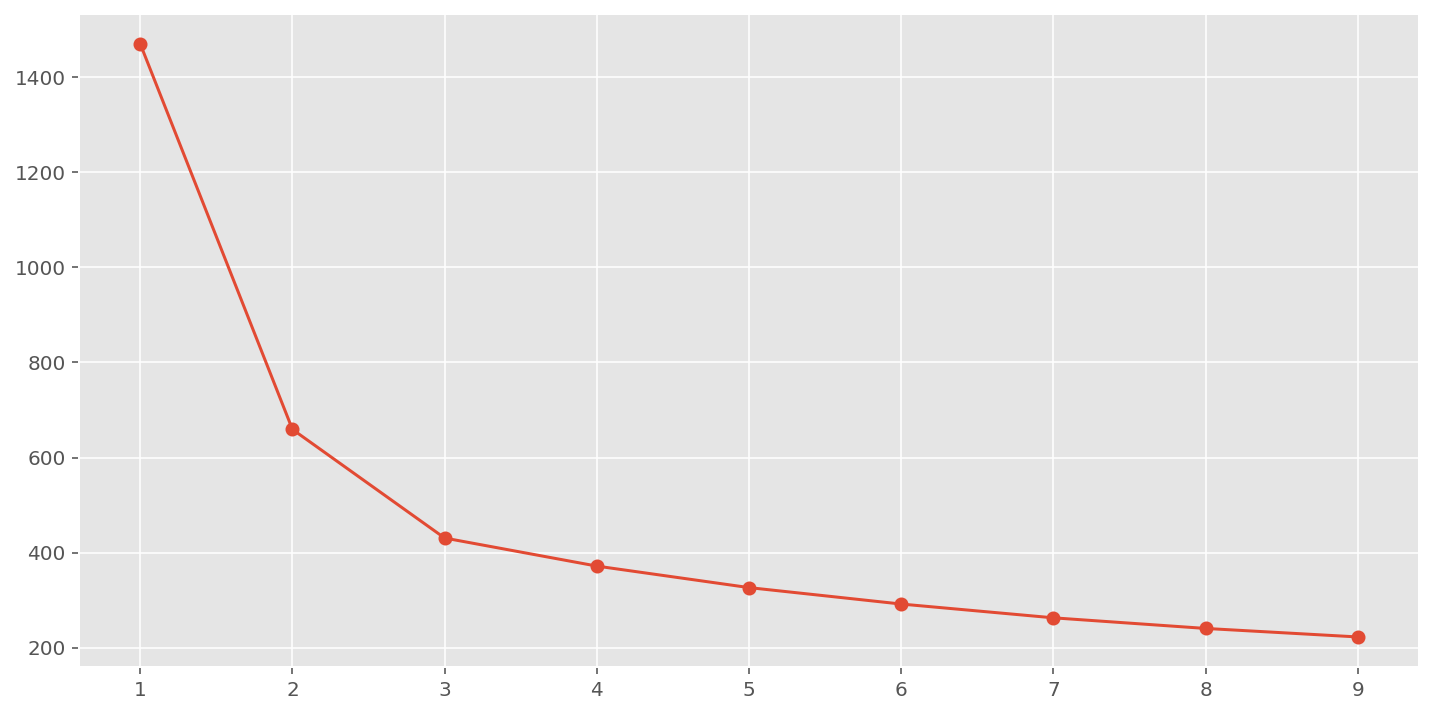

In [254]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [255]:
kmeans=KMeans(n_clusters=3, n_init=15,random_state=3)

In [256]:
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init=15, random_state=3)

In [257]:
centroids=kmeans.cluster_centers_

In [259]:
pd.DataFrame(centroids,columns=Data.columns)

,perimeter,area,lengthOfKernelGroove,lengthOfKernel,widthOfKernel,asymmetryCoefficient,compactness
0,-1.006649,-1.030253,-0.624809,-0.897685,-1.085583,0.694804,-0.964905
1,-0.170043,-0.141119,-0.585893,-0.257814,0.001647,-0.661919,0.449606
2,1.261966,1.256682,1.292308,1.237883,1.164852,-0.045219,0.560464


In [260]:
df_scaled['Class']=kmeans.labels_.astype('object')

In [261]:
df_scaled['Class'].value_counts()

0    72
1    71
2    67
Name: Class, dtype: int64

In [262]:
df_k=df_scaled.copy()
df_k.head()

,perimeter,area,lengthOfKernelGroove,lengthOfKernel,widthOfKernel,asymmetryCoefficient,compactness,Class
0,0.215462,0.142098,-0.383577,0.304218,0.141702,-0.986152,0.000061,1
1,0.008224,0.011188,-0.922013,-0.168625,0.197432,-1.788166,0.428515,1
2,-0.360201,-0.192067,-1.189192,-0.763637,0.208048,-0.667479,1.442383,1
3,-0.475333,-0.347091,-1.229983,-0.688978,0.319508,-0.960818,1.039381,1
4,0.330595,0.445257,-0.475356,0.066666,0.805159,-1.563495,1.374509,1


In [263]:
from mpl_toolkits.mplot3d import Axes3D

/var/folders/nk/1lqgzrn55493sq3fvvb5wv6m0000gn/T/ipykernel_14393/373243381.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
/var/folders/nk/1lqgzrn55493sq3fvvb5wv6m0000gn/T/ipykernel_14393/373243381.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df_scaled.iloc[:, 0], df_scaled.ilo

Text(0.5, 0.92, '3D plot of KMeans Clustering')

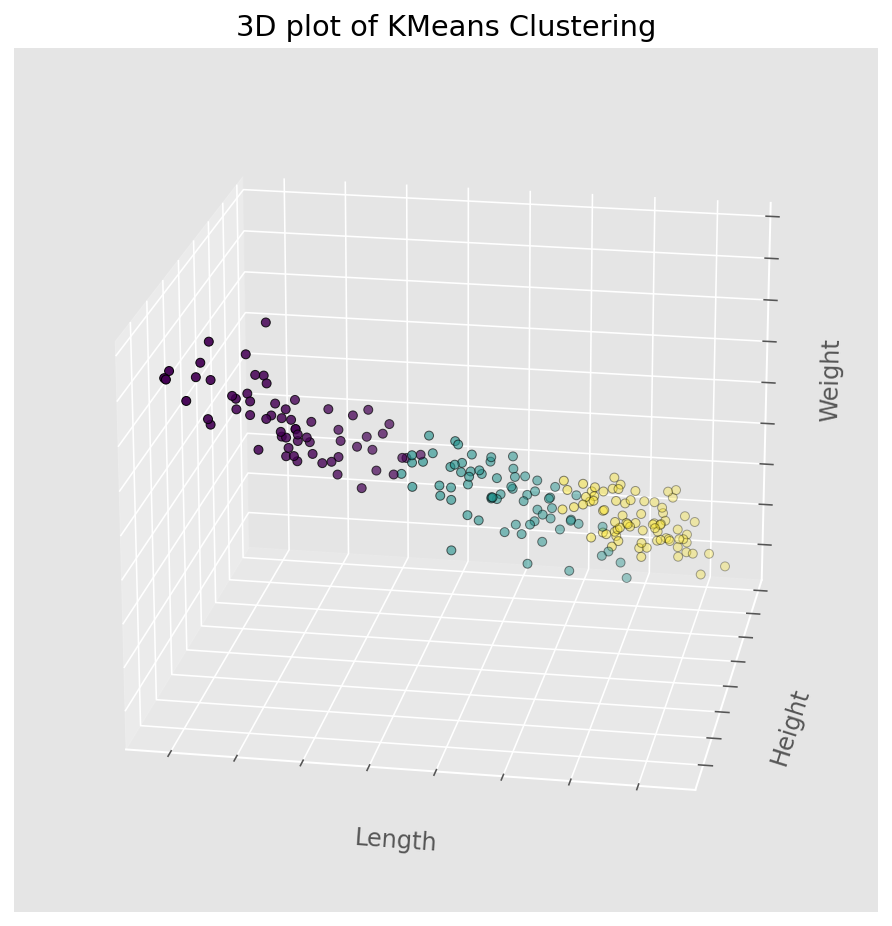

In [265]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
kmeans.fit(Data)
labels = kmeans.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [266]:
# Import Library for Hierarchical clustering

import matplotlib.pyplot as plt  
from sklearn.cluster import AgglomerativeClustering

In [267]:
# Plotting of Dendrogram

import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance in the space with other variables')

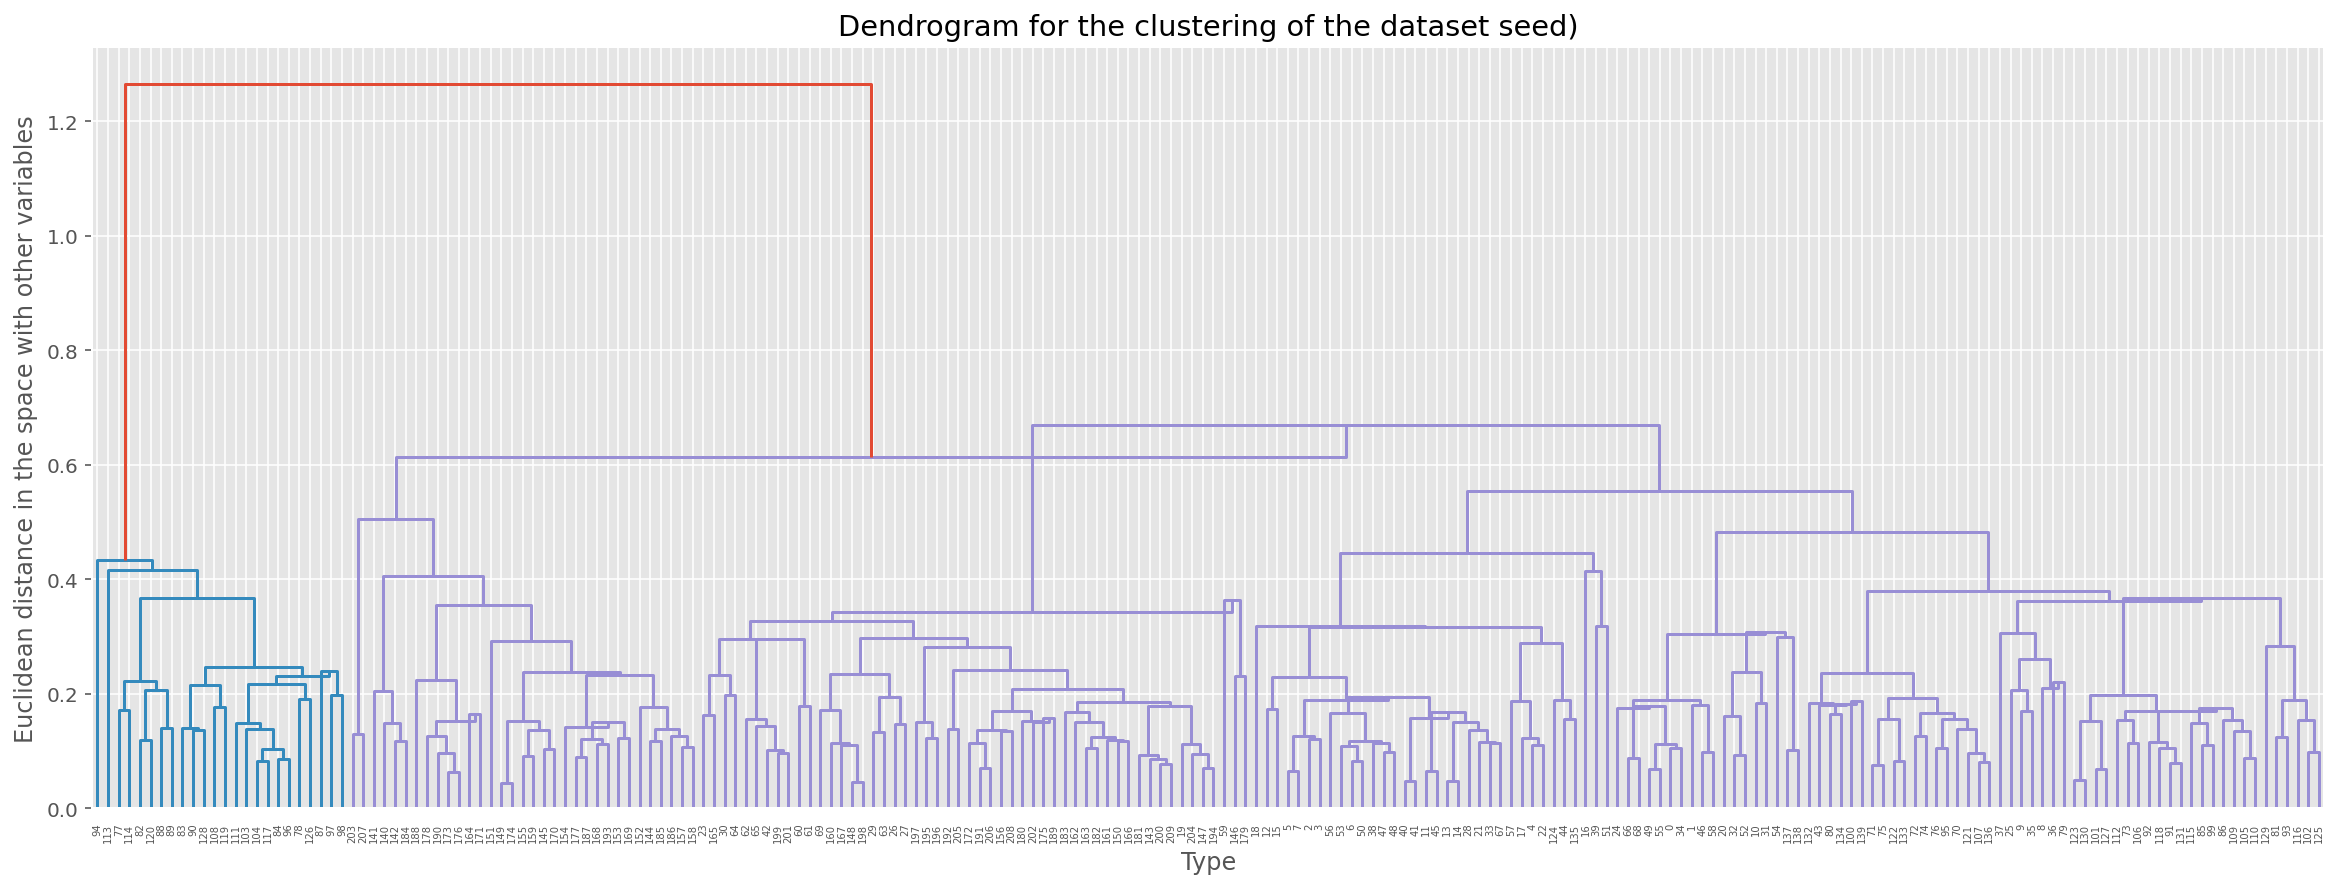

In [272]:
#Decide the number of clusters by using this dendrogram
Z = sch.linkage(Data, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset seed)')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [273]:
# Building an Agglomerative Clustering Model

#Initialise Model

cluster_H = AgglomerativeClustering(n_clusters=3)

In [275]:
# Modelling the data
model_clt = cluster_H.fit(Data)
model_clt
pred1 = model_clt.labels_
pred1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

/var/folders/nk/1lqgzrn55493sq3fvvb5wv6m0000gn/T/ipykernel_14393/1128626752.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
/var/folders/nk/1lqgzrn55493sq3fvvb5wv6m0000gn/T/ipykernel_14393/1128626752.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(df_scaled.iloc[:, 0], df_scaled.i

Text(0.5, 0.92, '3D plot of H Clustering')

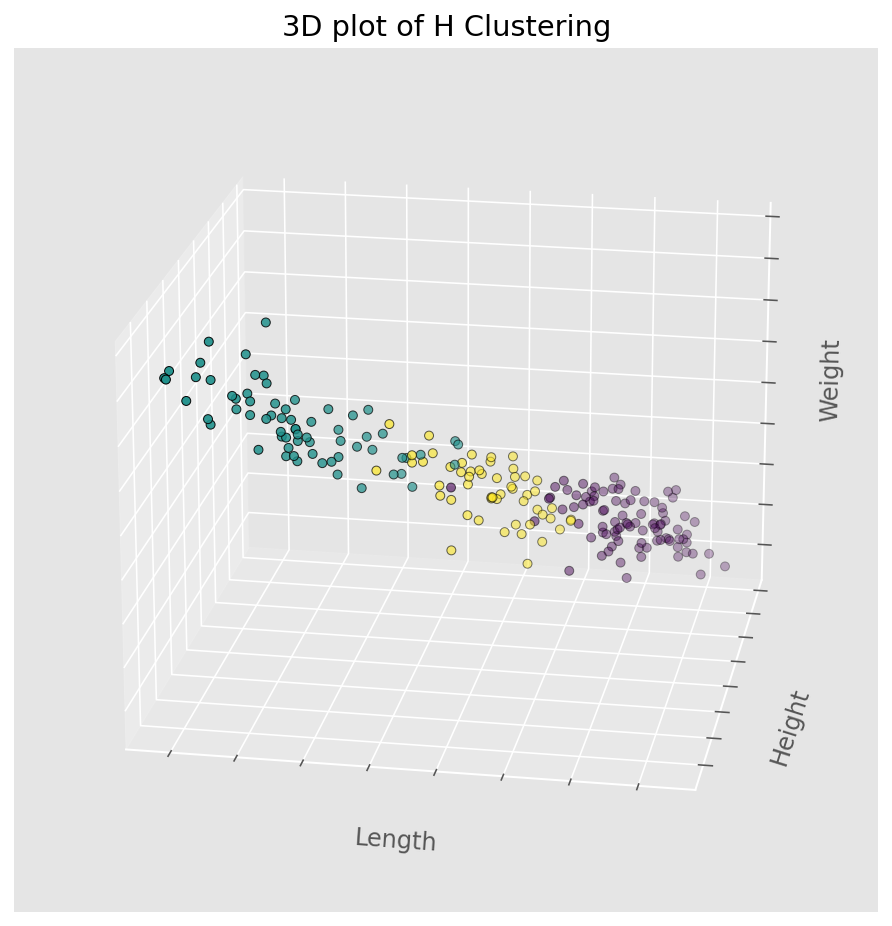

In [282]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
cluster_H.fit(Data)
labels = cluster_H.labels_
ax.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], df_scaled.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of H Clustering')